# A2 - Introdução à Ciência de Dados

Análise de dados de uma base de estadias em hotéis da Europa com 120 entradas.

As perguntas que analisaremos serão:

1. Qual a média de preço?
2. Notas são consistentes entre as cidades?
3. Classificações mais altas resultam em notas mais altas?

## Preparação da Base



### Bibliotecas

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

### Base

In [3]:
data = pd.read_excel("Hotels.xlsx", engine='openpyxl')
data.head()

,ID,Hotel name,Price(BAM),Hotel star rating,Distance,Customer rating,Rooms,Squares,City
0,1,Europe,139,5,350,8.3,1,25,Sarajevo
1,2,Europe,187,5,350,8.3,2,40,Sarajevo
2,3,Hills,255,5,10000,8.5,3,42,Sarajevo
3,4,Hills,141,5,10000,8.5,2,42,Sarajevo
4,5,Boutique,117,4,450,8.7,1,15,Sarajevo


## Qual a média de preço?

## Notas são consistentes entre as cidades?

Para analisar se as notas são consistentes entre as cidades vamos primeiramente ver se em cada cidade, as notas de diferentes hoteis vão ser consistentes.
Para isso devemos primeiramente separar os dados por cidade, obtendo assim quatro conjuntos de dados diferentes:

In [40]:
select_city1 = data.loc[data['City'] == 'Sarajevo']
select_city2 = data.loc[data['City'] == 'Zagreb']
select_city3 = data.loc[data['City'] == 'Belgrade']
select_city4 = data.loc[data['City'] == 'Ljubljana']

Agora que os dados estão separados por cidade podemos analisar um por um para ver se os hoteis de uma mesma cidade tem as notas consistentes.

Em um primeiro momento vamos nos interessar à classificação dos hoteis (por estrela) para comparar os hoteis.

Text(0.5, 0.98, 'Graficos das classificações em estrelas dos Hoteis para cada cidade')

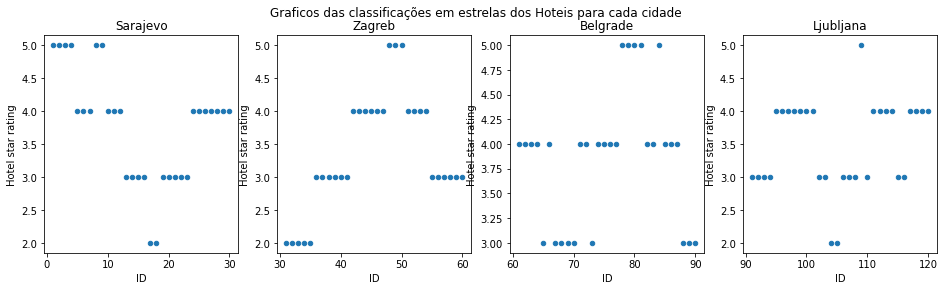

In [63]:
fig, ax=plt.subplots(1,4,figsize=(16,4))
select_city1.plot(x='ID', y='Hotel star rating', kind='scatter', ax=ax[0]).set_title('Sarajevo')
select_city2.plot(x='ID', y='Hotel star rating', kind='scatter', ax=ax[1]).set_title('Zagreb')
select_city3.plot(x='ID', y='Hotel star rating', kind='scatter', ax=ax[2]).set_title('Belgrade')
select_city4.plot(x='ID', y='Hotel star rating', kind='scatter', ax=ax[3]).set_title('Ljubljana')
pl.suptitle("Graficos das classificações em estrelas dos Hoteis para cada cidade")

Como podemos ver nos gráficos acima, mesmo com os hoteis estando nas memas cidades suas classificações variam bastante todas vão de 2 até 5, menos Belgrade que varia de somente 3 até 5 ,mas mesmo assim não apresenta resultados muitos consistentes.

Para ter uma outra visão de comparação das cidades, podemos mudar a classificação do hotel para a avaliação dos clientes já que as duas variaveis são do tipo nota. Assim obtemos os seguintes gráficos:

Text(0.5, 0.98, 'Graficos das avalções dos clientes em diferentes Hoteis para cada cidade')

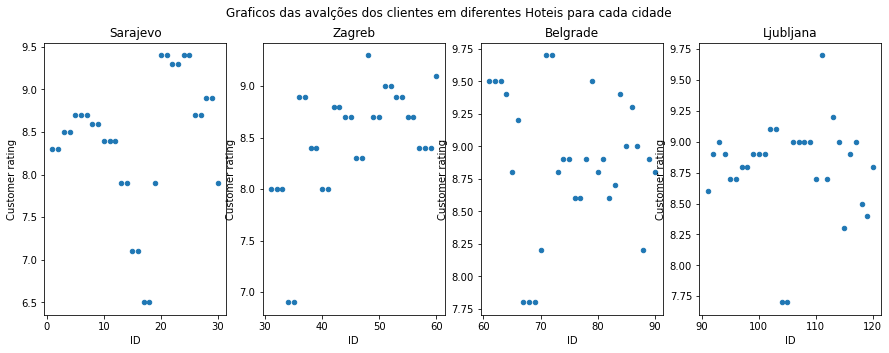

In [65]:
fig, ax=plt.subplots(1,4,figsize=(15,5))
select_city1.plot(x='ID', y='Customer rating', kind='scatter', ax=ax[0]).set_title('Sarajevo')
select_city2.plot(x='ID', y='Customer rating', kind='scatter', ax=ax[1]).set_title('Zagreb')
select_city3.plot(x='ID', y='Customer rating', kind='scatter', ax=ax[2]).set_title('Belgrade')
select_city4.plot(x='ID', y='Customer rating', kind='scatter', ax=ax[3]).set_title('Ljubljana')
pl.suptitle("Graficos das avalções dos clientes em diferentes Hoteis para cada cidade")

Com estes gráficos podemos observar uma certa consistencia nas notas: Para as duas primeiras cidades (Sarajevo e Zagreb) podemos ver que a maioria das notas está acima de 8, e para Zagreb, também abaixo de 9. 
Para Ljubljana, os resultados se encontram em um intervalo ainda menor: entre 8,5 e 9,25, com muitas poucas exceções.
E para Belgrade finalmente, podemos ver uma maioria de hoteis com avaliações entre 8,5 e 9,5.

Se juntarmos os resultados podemos ver que a grande maioria dos hoteis vai ter uma nota entre 8 e 9,5. Podemos então dizer que a uma consistencia nas notas, mas isto não depende da cidade.

Apesar de tudo, a nota que é dada pelo cliente é sómente sobre sua estadia no hotel, enquanto a classificação avalia o hotel em vários níveis. Então mesmo estando na mesma cidade, não há consistencia nas notas dos hoteis.

Mas podemos também nos perguntar se o fato de hoteis serem de diferentes cidades realmente influencia nas notas.

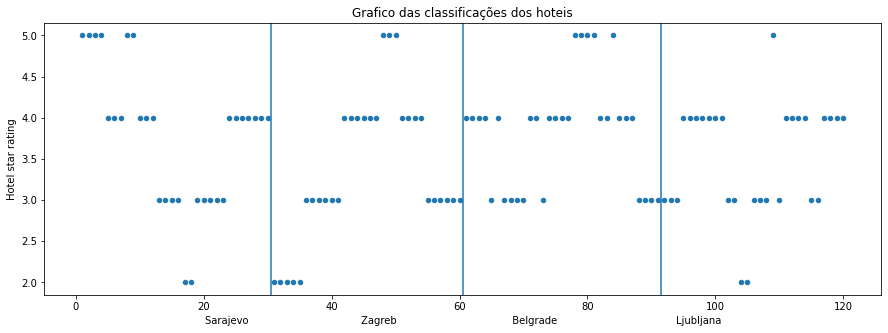

In [93]:
data.plot(x='ID', y='Hotel star rating', kind='scatter', figsize=(15,5)).set_title('Grafico das classificações dos hoteis')
plt.xlabel('Sarajevo                                    Zagreb                                     Belgrade                                      Ljubljana')
plt.axvline(x=30.5)
plt.axvline(x=60.5)
plt.axvline(x=91.5)

Podemos então ver atrvés este último grafico que independente da cidade a maioria das classificações são entre 3 e 4. Então é possivel dizer que entre estas cidades, e possívelmente outras, vai haver uma coherencia nos resultados.

## Classificações mais altas resultam em notas mais altas?

### Contagem dos Hotéis

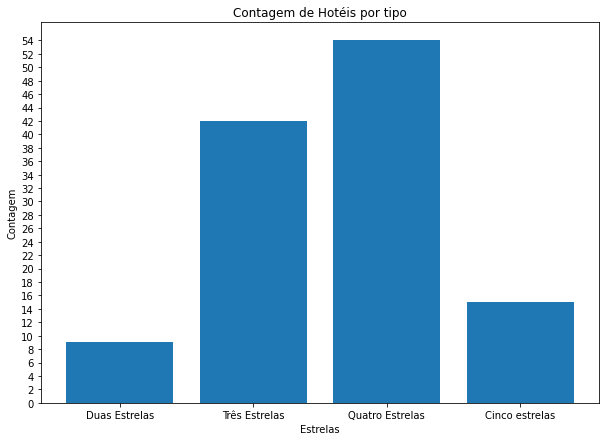

In [43]:
fig, ax = plt.subplots(figsize = (10,7))

ax.bar(x = ["Duas Estrelas", "Três Estrelas", "Quatro Estrelas", "Cinco estrelas"], 
       height = data["Hotel star rating"].value_counts(sort = False))

ax.set(title = "Contagem de Hotéis por tipo", xlabel = "Estrelas", ylabel = "Contagem")

plt.yticks(range(0, max(data["Hotel star rating"].value_counts(sort = False)) + 1, 2))

plt.show()


### Cálculo das médias

In [139]:
def get_average_rating(rating):
    filtered = data[(data["Hotel star rating"] == rating)]
    amount = len(filtered["Customer rating"])
    rating_sum = sum(filtered["Customer rating"])

    return round((rating_sum * 10 / amount))/10

averages = map(lambda n: get_average_rating(n) - 7, [2,3,4,5])


### Gráficos e Resultado

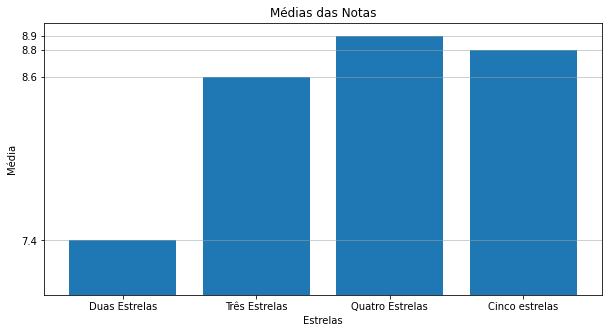

In [140]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x = ["Duas Estrelas", "Três Estrelas", "Quatro Estrelas", "Cinco estrelas"], 
       height = list(averages), bottom=7)

ax.set(title = "Médias das Notas", xlabel = "Estrelas", ylabel = "Média")

plt.yticks([7.4, 8.6, 8.9, 8.8])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.5)
plt.show()

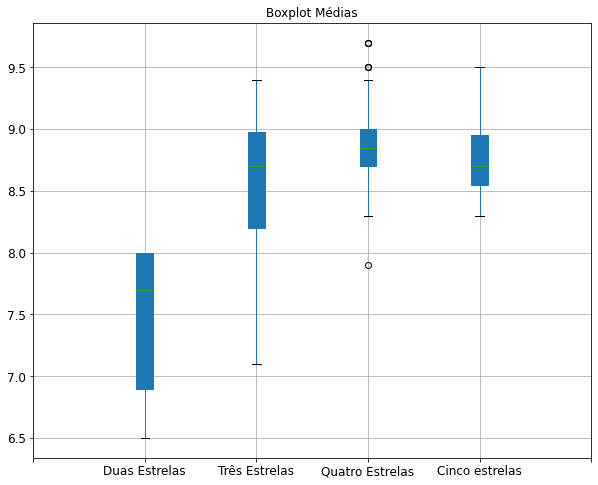

In [141]:
def get_star_filtered_ratings(rating):
    return data[(data["Hotel star rating"] == rating)]["Customer rating"]

fig, ax = plt.subplots(figsize = (10,8))

pd.DataFrame(get_star_filtered_ratings(2)).boxplot(fontsize= 12, positions=[1], patch_artist=True, vert = True)
pd.DataFrame(get_star_filtered_ratings(3)).boxplot(fontsize= 12, positions=[2], patch_artist=True, vert = True)
pd.DataFrame(get_star_filtered_ratings(4)).boxplot(fontsize= 12, positions=[3], patch_artist=True, vert = True)
pd.DataFrame(get_star_filtered_ratings(5)).boxplot(fontsize= 12, positions=[4], patch_artist=True, vert = True)

ticks = ["","Duas Estrelas", "Três Estrelas", "Quatro Estrelas", "Cinco estrelas",""]

plt.xticks(range(0, len(ticks)), ticks)

ax.set(title = "Boxplot Médias");

### Resultado

Mesmo com a média do hotel quatro estrelas maior do que a de cinco estrelas, podemos ver no gráfico acima que <b>hotéis com mais estrelas tendem a ter notas melhores</b>.

A média ligeiramente maior dos hotéis quatro estrelas pode ser explicado pelo fato de haver mais linhas de hotéis quatro estrelas do que cinco.